In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0

# Define the generator
generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

# Define the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Compile the combined GAN model
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Define the save_generated_images function
def save_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
        axs[i].axis("off")
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Training loop
batch_size = 64
epochs = 10000

for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)


2/2 [==============================] - 1s 40ms/step
Epoch 0, D Loss: 0.7129549086093903, G Loss: 0.6943315863609314
1/1 [==============================] - 0s 245ms/step


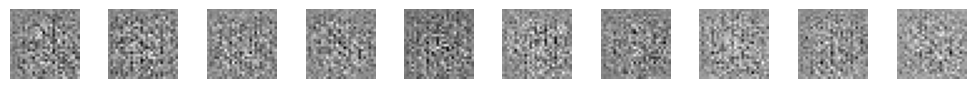

2/2 [==============================] - 0s 71ms/step
Epoch 100, D Loss: 0.575482964515686, G Loss: 0.7543001174926758
2/2 [==============================] - 0s 58ms/step
Epoch 200, D Loss: 0.6622160375118256, G Loss: 0.6618322134017944
2/2 [==============================] - 0s 68ms/step
Epoch 300, D Loss: 0.6797188520431519, G Loss: 0.6948795914649963
2/2 [==============================] - 0s 70ms/step


2/2 [==============================] - 0s 71ms/step
Epoch 400, D Loss: 0.6783535182476044, G Loss: 0.7192370295524597
2/2 [==============================] - 0s 74ms/step
Epoch 500, D Loss: 0.6768369972705841, G Loss: 0.7411760687828064
2/2 [==============================] - 0s 69ms/step
Epoch 600, D Loss: 0.6900361776351929, G Loss: 0.7381253242492676
2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 80ms/step
Epoch 700, D Loss: 0.6830006539821625, G Loss: 0.7608800530433655
2/2 [==============================] - 0s 57ms/step
Epoch 800, D Loss: 0.6910976469516754, G Loss: 0.7535688281059265
2/2 [==============================] - 0s 69ms/step
Epoch 900, D Loss: 0.6866181492805481, G Loss: 0.7625634074211121
2/2 [==============================] - 0s 72ms/step


2/2 [==============================] - 0s 67ms/step
Epoch 1000, D Loss: 0.6915997564792633, G Loss: 0.7449691295623779
1/1 [==============================] - 0s 62ms/step


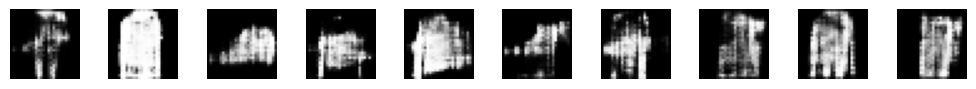

2/2 [==============================] - 0s 73ms/step
Epoch 1100, D Loss: 0.691665768623352, G Loss: 0.7593849301338196
2/2 [==============================] - 0s 73ms/step
Epoch 1200, D Loss: 0.682171106338501, G Loss: 0.7402873039245605
2/2 [==============================] - 0s 73ms/step
Epoch 1300, D Loss: 0.6904788613319397, G Loss: 0.7486064434051514
2/2 [==============================] - 0s 70ms/step


2/2 [==============================] - 0s 73ms/step
Epoch 1400, D Loss: 0.686331033706665, G Loss: 0.7419677972793579
2/2 [==============================] - 0s 73ms/step
Epoch 1500, D Loss: 0.6949505507946014, G Loss: 0.7412186861038208
2/2 [==============================] - 0s 90ms/step
Epoch 1600, D Loss: 0.68596550822258, G Loss: 0.7367448210716248
2/2 [==============================] - 0s 72ms/step


2/2 [==============================] - 0s 79ms/step
Epoch 1700, D Loss: 0.6888146698474884, G Loss: 0.7301697731018066
2/2 [==============================] - 0s 87ms/step
Epoch 1800, D Loss: 0.6893927454948425, G Loss: 0.7413758039474487
2/2 [==============================] - 0s 83ms/step
Epoch 1900, D Loss: 0.6878012716770172, G Loss: 0.7284393310546875
2/2 [==============================] - 0s 72ms/step


2/2 [==============================] - 0s 76ms/step
Epoch 2000, D Loss: 0.6959441602230072, G Loss: 0.7238121032714844
1/1 [==============================] - 0s 60ms/step


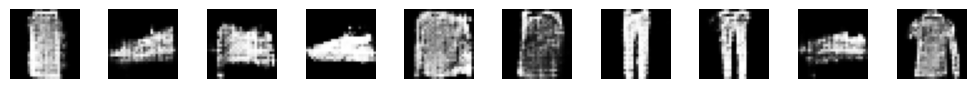

2/2 [==============================] - 0s 81ms/step
Epoch 2100, D Loss: 0.6973417103290558, G Loss: 0.7260258197784424
2/2 [==============================] - 0s 74ms/step
Epoch 2200, D Loss: 0.687067985534668, G Loss: 0.735867440700531
2/2 [==============================] - 0s 74ms/step
Epoch 2300, D Loss: 0.6928140223026276, G Loss: 0.7200280427932739
2/2 [==============================] - 0s 75ms/step


2/2 [==============================] - 0s 71ms/step
Epoch 2400, D Loss: 0.6959880292415619, G Loss: 0.7309626340866089
2/2 [==============================] - 0s 76ms/step
Epoch 2500, D Loss: 0.6895490288734436, G Loss: 0.7252132892608643
2/2 [==============================] - 0s 103ms/step
Epoch 2600, D Loss: 0.6891376078128815, G Loss: 0.7080906629562378
2/2 [==============================] - 0s 72ms/step


2/2 [==============================] - 0s 89ms/step
Epoch 2700, D Loss: 0.6881668865680695, G Loss: 0.7254665493965149
2/2 [==============================] - 0s 95ms/step
Epoch 2800, D Loss: 0.6944391131401062, G Loss: 0.7255376577377319
2/2 [==============================] - 0s 82ms/step
Epoch 2900, D Loss: 0.6905190348625183, G Loss: 0.7086963653564453
2/2 [==============================] - 0s 74ms/step


2/2 [==============================] - 0s 74ms/step
Epoch 3000, D Loss: 0.6901870667934418, G Loss: 0.7171869874000549
1/1 [==============================] - 0s 63ms/step


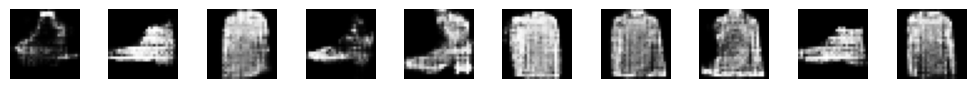

2/2 [==============================] - 0s 73ms/step
Epoch 3100, D Loss: 0.6909795999526978, G Loss: 0.704629123210907
2/2 [==============================] - 0s 85ms/step
Epoch 3200, D Loss: 0.6915901899337769, G Loss: 0.7199680805206299
2/2 [==============================] - 0s 74ms/step
Epoch 3300, D Loss: 0.6976670920848846, G Loss: 0.7126777172088623
2/2 [==============================] - 0s 75ms/step


2/2 [==============================] - 0s 75ms/step
Epoch 3400, D Loss: 0.6917731463909149, G Loss: 0.7187976241111755
2/2 [==============================] - 0s 91ms/step
Epoch 3500, D Loss: 0.6887131929397583, G Loss: 0.7126891016960144
2/2 [==============================] - 0s 93ms/step
Epoch 3600, D Loss: 0.691837877035141, G Loss: 0.7270585298538208
2/2 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 76ms/step
Epoch 3700, D Loss: 0.6900282502174377, G Loss: 0.722736120223999
2/2 [==============================] - 0s 76ms/step
Epoch 3800, D Loss: 0.6940216422080994, G Loss: 0.6947295665740967
2/2 [==============================] - 0s 77ms/step
Epoch 3900, D Loss: 0.696624755859375, G Loss: 0.7155364751815796
2/2 [==============================] - 0s 76ms/step


2/2 [==============================] - 0s 75ms/step
Epoch 4000, D Loss: 0.6948403120040894, G Loss: 0.7232792377471924
1/1 [==============================] - 0s 78ms/step


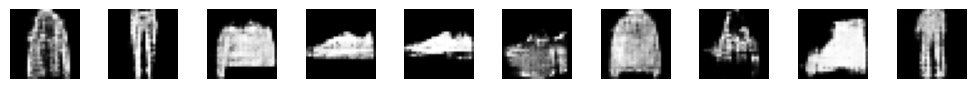

2/2 [==============================] - 0s 85ms/step
Epoch 4100, D Loss: 0.6932957172393799, G Loss: 0.730305552482605
2/2 [==============================] - 0s 84ms/step
Epoch 4200, D Loss: 0.6975314319133759, G Loss: 0.7078357934951782
2/2 [==============================] - 0s 78ms/step
Epoch 4300, D Loss: 0.686953604221344, G Loss: 0.7159028053283691
2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 78ms/step
Epoch 4400, D Loss: 0.6894069612026215, G Loss: 0.7166772484779358
2/2 [==============================] - 0s 69ms/step
Epoch 4500, D Loss: 0.692759782075882, G Loss: 0.7301017045974731
2/2 [==============================] - 0s 85ms/step
Epoch 4600, D Loss: 0.6872860491275787, G Loss: 0.7189826965332031
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 85ms/step
Epoch 4700, D Loss: 0.690087080001831, G Loss: 0.7176306247711182
2/2 [==============================] - 0s 78ms/step
Epoch 4800, D Loss: 0.6905151605606079, G Loss: 0.7117637395858765
2/2 [==============================] - 0s 78ms/step
Epoch 4900, D Loss: 0.6976594924926758, G Loss: 0.7105517387390137
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 91ms/step
Epoch 5000, D Loss: 0.6857874691486359, G Loss: 0.7083259224891663
1/1 [==============================] - 0s 78ms/step


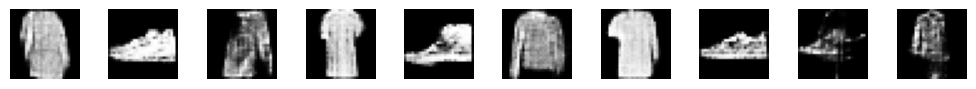

2/2 [==============================] - 0s 78ms/step
Epoch 5100, D Loss: 0.690553605556488, G Loss: 0.7234317660331726
2/2 [==============================] - 0s 78ms/step
Epoch 5200, D Loss: 0.6782001852989197, G Loss: 0.7050600051879883
2/2 [==============================] - 0s 78ms/step
Epoch 5300, D Loss: 0.6864901781082153, G Loss: 0.7215367555618286
2/2 [==============================] - 0s 94ms/step


2/2 [==============================] - 0s 78ms/step
Epoch 5400, D Loss: 0.6891213655471802, G Loss: 0.7118747234344482
2/2 [==============================] - 0s 78ms/step
Epoch 5500, D Loss: 0.6912288665771484, G Loss: 0.6998250484466553
2/2 [==============================] - 0s 78ms/step
Epoch 5600, D Loss: 0.6881592869758606, G Loss: 0.7212188243865967
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 94ms/step
Epoch 5700, D Loss: 0.690697968006134, G Loss: 0.7155763506889343
2/2 [==============================] - 0s 94ms/step
Epoch 5800, D Loss: 0.6912203431129456, G Loss: 0.7008565664291382
2/2 [==============================] - 0s 94ms/step
Epoch 5900, D Loss: 0.687617689371109, G Loss: 0.7149790525436401
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 94ms/step
Epoch 6000, D Loss: 0.690669596195221, G Loss: 0.7133582830429077
1/1 [==============================] - 0s 78ms/step


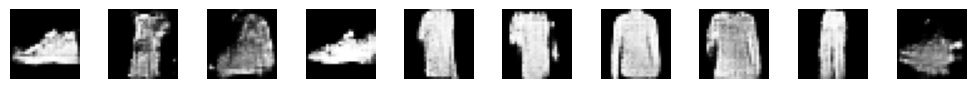

2/2 [==============================] - 0s 94ms/step
Epoch 6100, D Loss: 0.689129114151001, G Loss: 0.6888823509216309
2/2 [==============================] - 0s 94ms/step
Epoch 6200, D Loss: 0.6782221496105194, G Loss: 0.7023103833198547
2/2 [==============================] - 0s 94ms/step
Epoch 6300, D Loss: 0.690919816493988, G Loss: 0.7200738191604614
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 94ms/step
Epoch 6400, D Loss: 0.6866410672664642, G Loss: 0.6965415477752686
2/2 [==============================] - 0s 105ms/step
Epoch 6500, D Loss: 0.6887684464454651, G Loss: 0.7109969854354858
2/2 [==============================] - 0s 102ms/step
Epoch 6600, D Loss: 0.6828002035617828, G Loss: 0.7253955006599426
2/2 [==============================] - 0s 117ms/step


2/2 [==============================] - 0s 105ms/step
Epoch 6700, D Loss: 0.6850729584693909, G Loss: 0.7337279319763184
2/2 [==============================] - 0s 116ms/step
Epoch 6800, D Loss: 0.6847130060195923, G Loss: 0.748529851436615
2/2 [==============================] - 0s 96ms/step
Epoch 6900, D Loss: 0.6878494620323181, G Loss: 0.6952651143074036
2/2 [==============================] - 0s 105ms/step


2/2 [==============================] - 0s 117ms/step
Epoch 7000, D Loss: 0.6756294965744019, G Loss: 0.698944628238678
1/1 [==============================] - 0s 148ms/step


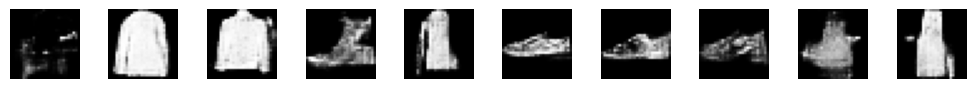

2/2 [==============================] - 0s 118ms/step
Epoch 7100, D Loss: 0.6922701895236969, G Loss: 0.7204537391662598
2/2 [==============================] - 0s 112ms/step
Epoch 7200, D Loss: 0.6956272721290588, G Loss: 0.7263228893280029
2/2 [==============================] - 0s 122ms/step
Epoch 7300, D Loss: 0.6957984566688538, G Loss: 0.707612156867981
2/2 [==============================] - 0s 120ms/step


2/2 [==============================] - 0s 109ms/step
Epoch 7400, D Loss: 0.6825754344463348, G Loss: 0.6987514495849609
2/2 [==============================] - 0s 109ms/step
Epoch 7500, D Loss: 0.6911891102790833, G Loss: 0.7351007461547852
2/2 [==============================] - 0s 109ms/step
Epoch 7600, D Loss: 0.6906474530696869, G Loss: 0.7267823219299316
2/2 [==============================] - 0s 109ms/step


2/2 [==============================] - 0s 109ms/step
Epoch 7700, D Loss: 0.6861768364906311, G Loss: 0.6983386874198914
2/2 [==============================] - 0s 94ms/step
Epoch 7800, D Loss: 0.685390055179596, G Loss: 0.6905609369277954
2/2 [==============================] - 0s 125ms/step
Epoch 7900, D Loss: 0.6864908337593079, G Loss: 0.7257230281829834
2/2 [==============================] - 0s 109ms/step


2/2 [==============================] - 0s 109ms/step
Epoch 8000, D Loss: 0.6860758066177368, G Loss: 0.7216867804527283
1/1 [==============================] - 0s 94ms/step


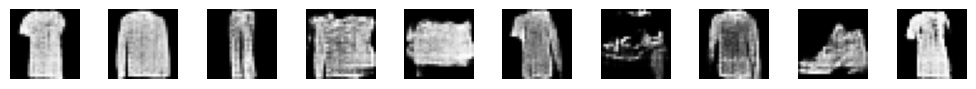

2/2 [==============================] - 0s 109ms/step
Epoch 8100, D Loss: 0.6878895163536072, G Loss: 0.722612738609314
2/2 [==============================] - 0s 109ms/step
Epoch 8200, D Loss: 0.6996276378631592, G Loss: 0.7257411479949951
2/2 [==============================] - 0s 109ms/step
Epoch 8300, D Loss: 0.6973094344139099, G Loss: 0.7098220586776733
2/2 [==============================] - 0s 109ms/step


2/2 [==============================] - 0s 125ms/step
Epoch 8400, D Loss: 0.6913766860961914, G Loss: 0.7064055800437927
2/2 [==============================] - 0s 125ms/step
Epoch 8500, D Loss: 0.6846165359020233, G Loss: 0.7150800824165344
2/2 [==============================] - 0s 125ms/step
Epoch 8600, D Loss: 0.6928654611110687, G Loss: 0.7350239753723145
2/2 [==============================] - 0s 125ms/step


2/2 [==============================] - 0s 109ms/step
Epoch 8700, D Loss: 0.6959686875343323, G Loss: 0.7352344989776611
2/2 [==============================] - 0s 151ms/step
Epoch 8800, D Loss: 0.6899192333221436, G Loss: 0.7454972863197327
2/2 [==============================] - 0s 141ms/step
Epoch 8900, D Loss: 0.687136173248291, G Loss: 0.7169780135154724
2/2 [==============================] - 0s 141ms/step


2/2 [==============================] - 0s 141ms/step
Epoch 9000, D Loss: 0.6882042586803436, G Loss: 0.7165363430976868
1/1 [==============================] - 0s 109ms/step


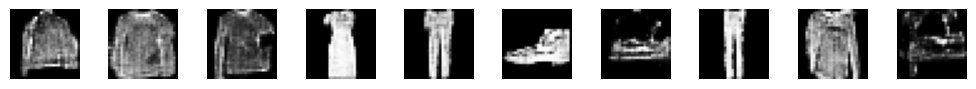

2/2 [==============================] - 0s 234ms/step
Epoch 9100, D Loss: 0.6939990818500519, G Loss: 0.7107320427894592
2/2 [==============================] - 0s 156ms/step
Epoch 9200, D Loss: 0.6831206977367401, G Loss: 0.7195624113082886
2/2 [==============================] - 0s 156ms/step
Epoch 9300, D Loss: 0.6905009746551514, G Loss: 0.7283457517623901
2/2 [==============================] - 0s 156ms/step


2/2 [==============================] - 0s 156ms/step
Epoch 9400, D Loss: 0.6859283447265625, G Loss: 0.7209202647209167
2/2 [==============================] - 0s 156ms/step
Epoch 9500, D Loss: 0.6820595562458038, G Loss: 0.7178922891616821
2/2 [==============================] - 0s 156ms/step
Epoch 9600, D Loss: 0.6809758245944977, G Loss: 0.7286266684532166
2/2 [==============================] - 0s 156ms/step


2/2 [==============================] - 0s 156ms/step
Epoch 9700, D Loss: 0.6861840486526489, G Loss: 0.6965229511260986
2/2 [==============================] - 0s 156ms/step
Epoch 9800, D Loss: 0.6864916682243347, G Loss: 0.7044835686683655
2/2 [==============================] - 0s 141ms/step
Epoch 9900, D Loss: 0.6815804839134216, G Loss: 0.6943138837814331
2/2 [==============================] - 0s 156ms/step


2/2 [==============================] - 0s 156ms/step


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0

# Rest of the code (generator, discriminator, training loop) remains the same.
# Ensure that you replace the dataset loading part with the new dataset as shown above.

# ... (Rest of the code remains the same)


# Define the generator
generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

# Define the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Compile the combined GAN model
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Define the save_generated_images function
def save_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
        axs[i].axis("off")
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Training loop
batch_size = 64
epochs = 10000

for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)


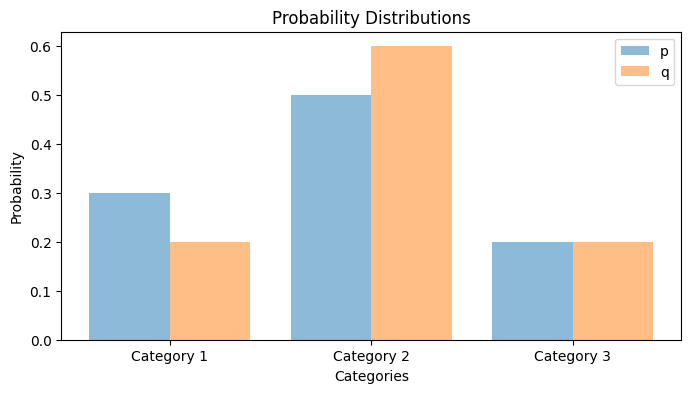

KL Divergence: 0.0305


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def kl_divergence(p, q):
    """
    Compute the Kullback-Leibler Divergence between two probability distributions p and q.
    
    Args:
    p, q: NumPy arrays representing the probability distributions.
    
    Returns:
    KL Divergence value.
    """
    return np.sum(p * np.log(p / q))

# Example probability distributions
p = np.array([0.3, 0.5, 0.2])  # Probability distribution p
q = np.array([0.2, 0.6, 0.2])  # Probability distribution q

# Calculate KL Divergence
kl_value = kl_divergence(p, q)

# Plot probability distributions
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(p)), p, alpha=0.5, label='p', width=0.4, align='center')
plt.bar(np.arange(len(q)) + 0.4, q, alpha=0.5, label='q', width=0.4, align='center')
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.xticks(np.arange(len(p)) + 0.2, ['Category 1', 'Category 2', 'Category 3'])
plt.legend()
plt.title('Probability Distributions')
plt.show()

# Display KL Divergence
print(f"KL Divergence: {kl_value:.4f}")


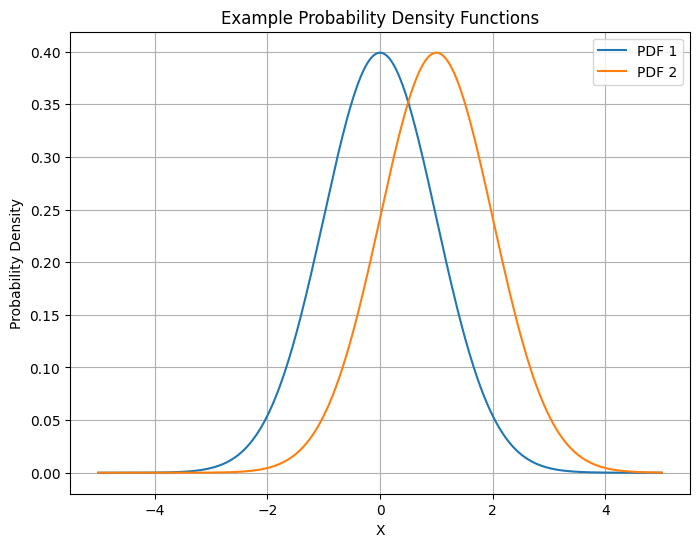

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate two example probability density functions (PDFs)
x = np.linspace(-5, 5, 1000)
pdf1 = norm.pdf(x, loc=0, scale=1)
pdf2 = norm.pdf(x, loc=1, scale=1)

# Plot the PDFs
plt.figure(figsize=(8, 6))
plt.plot(x, pdf1, label='PDF 1')
plt.plot(x, pdf2, label='PDF 2')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Example Probability Density Functions')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
def kld(p, q):
    return np.sum(p * np.log(p / q))

def jsd(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kld(p, m) + 0.5 * kld(q, m)

# Calculate KLD and JSD
kld_value = kld(pdf1, pdf2)
jsd_value = jsd(pdf1, pdf2)

print(f'Kullback-Leibler Divergence: {kld_value:.4f}')
print(f'Jensen-Shannon Divergence: {jsd_value:.4f}')


Kullback-Leibler Divergence: 49.9500
Jensen-Shannon Divergence: 11.1300


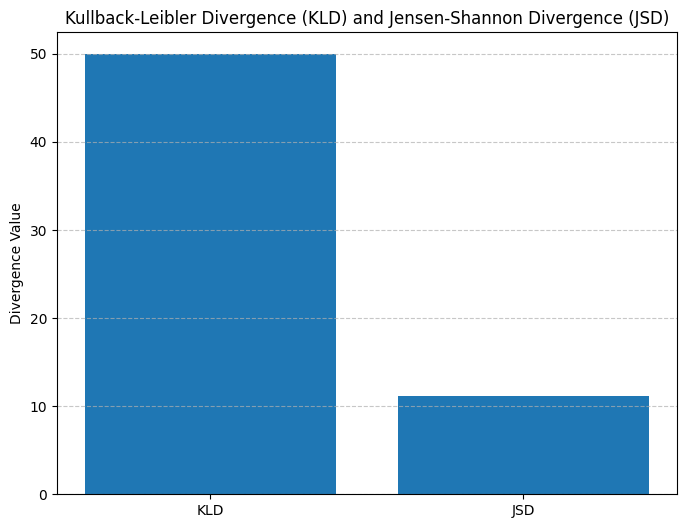

In [3]:
# Plot KLD and JSD values
plt.figure(figsize=(8, 6))
plt.bar(['KLD', 'JSD'], [kld_value, jsd_value])
plt.ylabel('Divergence Value')
plt.title('Kullback-Leibler Divergence (KLD) and Jensen-Shannon Divergence (JSD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Code for Vanilla GAN updated

2/2 [==============================] - 3s 175ms/step
Epoch 0, D Loss: 0.7162952721118927, G Loss: 0.7302972078323364
1/1 [==============================] - 0s 310ms/step


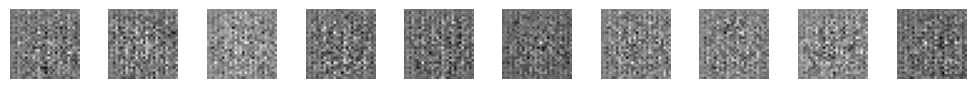

2/2 [==============================] - 0s 64ms/step
Epoch 100, D Loss: 0.6668508648872375, G Loss: 0.6919147968292236
2/2 [==============================] - 0s 121ms/step
Epoch 200, D Loss: 0.6772173345088959, G Loss: 0.6741326451301575
2/2 [==============================] - 0s 80ms/step
Epoch 300, D Loss: 0.676310122013092, G Loss: 0.7046622037887573
2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 70ms/step
Epoch 400, D Loss: 0.68878373503685, G Loss: 0.7387793064117432
2/2 [==============================] - 0s 101ms/step
Epoch 500, D Loss: 0.6796700358390808, G Loss: 0.7395481467247009
2/2 [==============================] - 0s 89ms/step
Epoch 600, D Loss: 0.69163978099823, G Loss: 0.7448089122772217
2/2 [==============================] - 0s 63ms/step


1/2 [==============>...............] - ETA: 0s

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0

# Define the generator
generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

# Define the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Compile the combined GAN model
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Define the save_generated_images function
def save_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
        axs[i].axis("off")
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Training loop
batch_size = 64
epochs = 20000  # Increased training epochs

for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)


# car dataset

In [4]:
import os
import cv2
import numpy as np
# Specify the path to the folder containing car images
dataset_path = "C:\\Users\\ramch\\Documents\\GenerativeAIBook\\Chapter 4\\thecarconnectionpicturedataset"

# Create a list to store the images
car_images = []

# Loop through the images in the dataset folder
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dataset_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        img = cv2.resize(img, (28, 28))  # Resize image to 28x28 pixels
        img = img.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
        car_images.append(img)

# Convert the list of images to a numpy array
x_train = np.array(car_images)

# Reshape the images to (num_samples, 28, 28, 1) format
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Rest of the code (generator, discriminator, training loop) remains the same.


2/2 [==============================] - 3s 53ms/step
Epoch 0, D Loss: 0.7253871262073517, G Loss: 0.6765625476837158
1/1 [==============================] - 0s 406ms/step


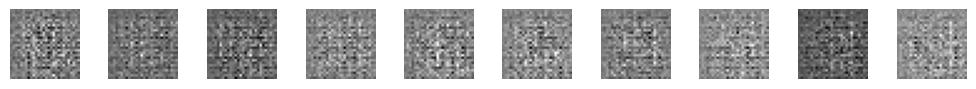

2/2 [==============================] - 0s 55ms/step
Epoch 100, D Loss: 0.7165988087654114, G Loss: 0.6487696170806885
2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 59ms/step
Epoch 200, D Loss: 0.7007717192173004, G Loss: 0.6573591828346252
2/2 [==============================] - 0s 62ms/step
Epoch 300, D Loss: 0.6982646584510803, G Loss: 0.6764807105064392
2/2 [==============================] - 0s 61ms/step


2/2 [==============================] - 0s 58ms/step
Epoch 400, D Loss: 0.6968768537044525, G Loss: 0.688028872013092
2/2 [==============================] - 0s 64ms/step


2/2 [==============================] - 0s 73ms/step
Epoch 500, D Loss: 0.6950674951076508, G Loss: 0.6904563903808594
2/2 [==============================] - 0s 64ms/step
Epoch 600, D Loss: 0.6951043009757996, G Loss: 0.6957746744155884
2/2 [==============================] - 0s 60ms/step


2/2 [==============================] - 0s 66ms/step
Epoch 700, D Loss: 0.6946614384651184, G Loss: 0.6952546834945679
2/2 [==============================] - 0s 81ms/step


2/2 [==============================] - 0s 65ms/step
Epoch 800, D Loss: 0.6934581398963928, G Loss: 0.6943874359130859
2/2 [==============================] - 0s 66ms/step
Epoch 900, D Loss: 0.6954521238803864, G Loss: 0.693183422088623
2/2 [==============================] - 0s 67ms/step


2/2 [==============================] - 0s 72ms/step
Epoch 1000, D Loss: 0.6940983533859253, G Loss: 0.6942380666732788
1/1 [==============================] - 0s 63ms/step


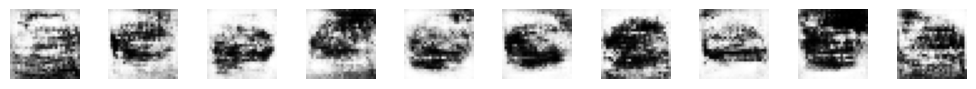

2/2 [==============================] - 0s 84ms/step
Epoch 1100, D Loss: 0.6944677233695984, G Loss: 0.6917852759361267
2/2 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 71ms/step
Epoch 1200, D Loss: 0.694133073091507, G Loss: 0.6962003111839294
2/2 [==============================] - 0s 68ms/step
Epoch 1300, D Loss: 0.6936840116977692, G Loss: 0.6906424164772034
2/2 [==============================] - 0s 70ms/step


2/2 [==============================] - 0s 72ms/step
Epoch 1400, D Loss: 0.694156676530838, G Loss: 0.6913475394248962
2/2 [==============================] - 0s 68ms/step


2/2 [==============================] - 0s 71ms/step
Epoch 1500, D Loss: 0.6940151154994965, G Loss: 0.6908184885978699
2/2 [==============================] - 0s 79ms/step
Epoch 1600, D Loss: 0.6946008205413818, G Loss: 0.6921505928039551
2/2 [==============================] - 0s 69ms/step


2/2 [==============================] - 0s 75ms/step
Epoch 1700, D Loss: 0.6942614912986755, G Loss: 0.6942182183265686
2/2 [==============================] - 0s 71ms/step


2/2 [==============================] - 0s 72ms/step
Epoch 1800, D Loss: 0.6938474476337433, G Loss: 0.6933517456054688
2/2 [==============================] - 0s 77ms/step
Epoch 1900, D Loss: 0.693207323551178, G Loss: 0.6930202841758728
2/2 [==============================] - 0s 99ms/step


2/2 [==============================] - 0s 88ms/step
Epoch 2000, D Loss: 0.6930695474147797, G Loss: 0.6946810483932495
1/1 [==============================] - 0s 97ms/step


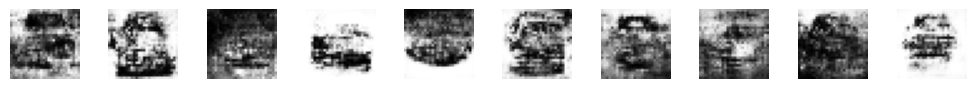

2/2 [==============================] - 0s 81ms/step
Epoch 2100, D Loss: 0.6927195489406586, G Loss: 0.6925275921821594
2/2 [==============================] - 0s 75ms/step


2/2 [==============================] - 0s 103ms/step
Epoch 2200, D Loss: 0.693877786397934, G Loss: 0.6944253444671631
2/2 [==============================] - 0s 77ms/step
Epoch 2300, D Loss: 0.6936491131782532, G Loss: 0.6948192119598389
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 71ms/step
Epoch 2400, D Loss: 0.6928888559341431, G Loss: 0.6972925066947937
2/2 [==============================] - 1s 253ms/step


2/2 [==============================] - 1s 245ms/step
Epoch 2500, D Loss: 0.6918284595012665, G Loss: 0.6958252191543579
2/2 [==============================] - 0s 99ms/step
Epoch 2600, D Loss: 0.6938610076904297, G Loss: 0.69478440284729
2/2 [==============================] - 1s 280ms/step


2/2 [==============================] - 0s 49ms/step
Epoch 2700, D Loss: 0.6934485137462616, G Loss: 0.6974817514419556
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 72ms/step
Epoch 2800, D Loss: 0.6922510862350464, G Loss: 0.6907795667648315
2/2 [==============================] - 0s 71ms/step
Epoch 2900, D Loss: 0.6924996674060822, G Loss: 0.6964303255081177
2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 63ms/step
Epoch 3000, D Loss: 0.6926580369472504, G Loss: 0.6934576034545898
1/1 [==============================] - 0s 63ms/step


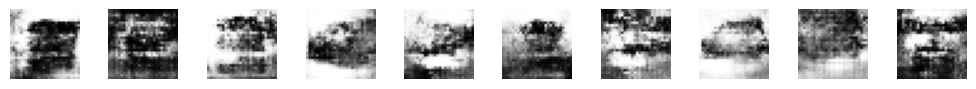

2/2 [==============================] - 0s 62ms/step
Epoch 3100, D Loss: 0.6922365725040436, G Loss: 0.6988837718963623
2/2 [==============================] - 0s 63ms/step


2/2 [==============================] - 0s 63ms/step
Epoch 3200, D Loss: 0.6924938261508942, G Loss: 0.6979291439056396
2/2 [==============================] - 0s 67ms/step
Epoch 3300, D Loss: 0.691063404083252, G Loss: 0.7014527320861816
2/2 [==============================] - 0s 78ms/step


2/2 [==============================] - 0s 61ms/step
Epoch 3400, D Loss: 0.6924641132354736, G Loss: 0.6987466216087341
2/2 [==============================] - 0s 91ms/step


2/2 [==============================] - 0s 63ms/step
Epoch 3500, D Loss: 0.6919037103652954, G Loss: 0.6956989765167236
2/2 [==============================] - 0s 66ms/step
Epoch 3600, D Loss: 0.6905752420425415, G Loss: 0.7009449005126953
2/2 [==============================] - 0s 61ms/step


2/2 [==============================] - 0s 62ms/step
Epoch 3700, D Loss: 0.690101146697998, G Loss: 0.7024725675582886
2/2 [==============================] - 0s 174ms/step


2/2 [==============================] - 1s 257ms/step
Epoch 3800, D Loss: 0.6915501952171326, G Loss: 0.6990570425987244
2/2 [==============================] - 0s 81ms/step
Epoch 3900, D Loss: 0.6932922303676605, G Loss: 0.6991235613822937
2/2 [==============================] - 0s 81ms/step


2/2 [==============================] - 0s 72ms/step
Epoch 4000, D Loss: 0.6937519907951355, G Loss: 0.6980013847351074
1/1 [==============================] - 0s 45ms/step


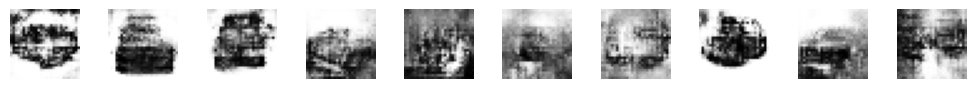

2/2 [==============================] - 0s 68ms/step
Epoch 4100, D Loss: 0.692389726638794, G Loss: 0.7042585015296936
2/2 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 78ms/step
Epoch 4200, D Loss: 0.6925839483737946, G Loss: 0.6992964744567871
2/2 [==============================] - 0s 79ms/step
Epoch 4300, D Loss: 0.6950686872005463, G Loss: 0.6976367235183716
2/2 [==============================] - 0s 80ms/step


2/2 [==============================] - 0s 80ms/step
Epoch 4400, D Loss: 0.6914573013782501, G Loss: 0.7091487646102905
2/2 [==============================] - 0s 90ms/step


2/2 [==============================] - 0s 76ms/step
Epoch 4500, D Loss: 0.6919192373752594, G Loss: 0.7040775418281555
2/2 [==============================] - 0s 71ms/step
Epoch 4600, D Loss: 0.6877251267433167, G Loss: 0.7057413458824158
2/2 [==============================] - 0s 79ms/step


2/2 [==============================] - 0s 77ms/step
Epoch 4700, D Loss: 0.6925326287746429, G Loss: 0.69815593957901
2/2 [==============================] - 0s 74ms/step


2/2 [==============================] - 0s 76ms/step
Epoch 4800, D Loss: 0.6903326213359833, G Loss: 0.7007641196250916
2/2 [==============================] - 0s 84ms/step
Epoch 4900, D Loss: 0.6935307383537292, G Loss: 0.7041444778442383
2/2 [==============================] - 0s 77ms/step


2/2 [==============================] - 0s 64ms/step
Epoch 5000, D Loss: 0.6890078783035278, G Loss: 0.7072349190711975
1/1 [==============================] - 0s 227ms/step


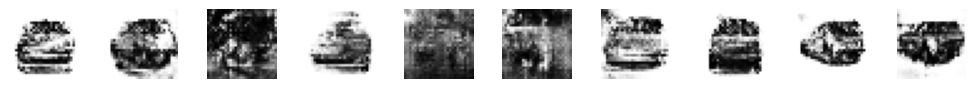

2/2 [==============================] - 0s 82ms/step
Epoch 5100, D Loss: 0.688470184803009, G Loss: 0.6998311877250671
2/2 [==============================] - 0s 88ms/step


2/2 [==============================] - 0s 70ms/step
Epoch 5200, D Loss: 0.6899528801441193, G Loss: 0.707830011844635
2/2 [==============================] - 0s 114ms/step
Epoch 5300, D Loss: 0.6899818480014801, G Loss: 0.7024838924407959
2/2 [==============================] - 0s 70ms/step


2/2 [==============================] - 0s 63ms/step
Epoch 5400, D Loss: 0.6935131549835205, G Loss: 0.707534909248352
2/2 [==============================] - 0s 63ms/step


2/2 [==============================] - 0s 80ms/step
Epoch 5500, D Loss: 0.6899321377277374, G Loss: 0.7047805786132812
2/2 [==============================] - 0s 62ms/step
Epoch 5600, D Loss: 0.6881844699382782, G Loss: 0.7046132683753967
2/2 [==============================] - 0s 51ms/step


2/2 [==============================] - 0s 68ms/step
Epoch 5700, D Loss: 0.6921081244945526, G Loss: 0.7081151008605957
2/2 [==============================] - 0s 65ms/step


2/2 [==============================] - 0s 78ms/step
Epoch 5800, D Loss: 0.6922609210014343, G Loss: 0.7028142809867859
2/2 [==============================] - 0s 60ms/step
Epoch 5900, D Loss: 0.6908564865589142, G Loss: 0.7089296579360962
2/2 [==============================] - 0s 55ms/step


2/2 [==============================] - 0s 73ms/step
Epoch 6000, D Loss: 0.6909478902816772, G Loss: 0.710457444190979
1/1 [==============================] - 1s 906ms/step


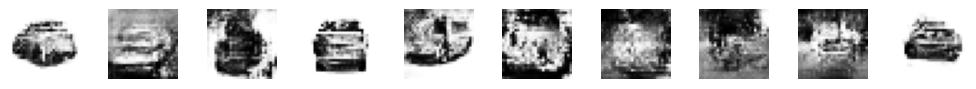

2/2 [==============================] - 0s 63ms/step
Epoch 6100, D Loss: 0.688995748758316, G Loss: 0.7096887826919556
2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 78ms/step
Epoch 6200, D Loss: 0.6905800402164459, G Loss: 0.7032335996627808
2/2 [==============================] - 0s 79ms/step


KeyboardInterrupt: 

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# Define the generator
generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

# Define the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Compile the combined GAN model
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Define the save_generated_images function
def save_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
        axs[i].axis("off")
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Training loop
batch_size = 64
epochs = 10000

for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)


4/4 [==============================] - 2s 83ms/step
Epoch 0, D Loss: 0.7265921533107758, G Loss: 0.6692177057266235
1/1 [==============================] - 1s 975ms/step


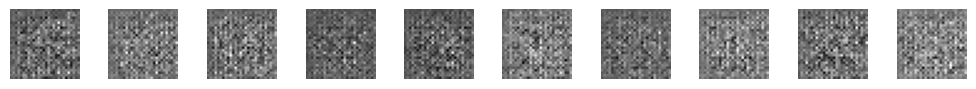

4/4 [==============================] - 0s 73ms/step
Epoch 100, D Loss: 0.6992190778255463, G Loss: 0.6561236381530762
4/4 [==============================] - 0s 73ms/step


4/4 [==============================] - 0s 84ms/step
Epoch 200, D Loss: 0.7013212442398071, G Loss: 0.6640645265579224
4/4 [==============================] - 0s 101ms/step
Epoch 300, D Loss: 0.6980840563774109, G Loss: 0.6795691251754761
4/4 [==============================] - 0s 78ms/step


4/4 [==============================] - 0s 73ms/step
Epoch 400, D Loss: 0.6953619122505188, G Loss: 0.6857661604881287
4/4 [==============================] - 0s 78ms/step


4/4 [==============================] - 0s 100ms/step
Epoch 500, D Loss: 0.6963532269001007, G Loss: 0.6914829611778259
4/4 [==============================] - 0s 78ms/step
Epoch 600, D Loss: 0.6953679919242859, G Loss: 0.6923761367797852
4/4 [==============================] - 0s 78ms/step


4/4 [==============================] - 0s 96ms/step
Epoch 700, D Loss: 0.6953807771205902, G Loss: 0.6894181966781616
4/4 [==============================] - 1s 185ms/step


4/4 [==============================] - 0s 78ms/step
Epoch 800, D Loss: 0.6950767338275909, G Loss: 0.6939884424209595
4/4 [==============================] - 0s 90ms/step
Epoch 900, D Loss: 0.6946875154972076, G Loss: 0.6960744857788086
4/4 [==============================] - 0s 78ms/step


4/4 [==============================] - 0s 80ms/step
Epoch 1000, D Loss: 0.6944227516651154, G Loss: 0.6909087300300598
1/1 [==============================] - 1s 651ms/step


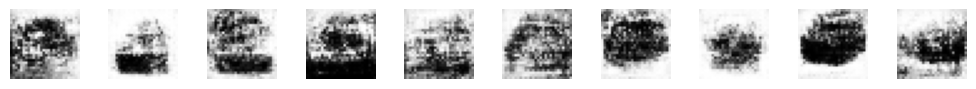

4/4 [==============================] - 0s 78ms/step
Epoch 1100, D Loss: 0.6944172978401184, G Loss: 0.6965808868408203
4/4 [==============================] - 0s 84ms/step


4/4 [==============================] - 0s 87ms/step
Epoch 1200, D Loss: 0.6946629881858826, G Loss: 0.6942579746246338
4/4 [==============================] - 0s 99ms/step
Epoch 1300, D Loss: 0.6943710446357727, G Loss: 0.6957907676696777
4/4 [==============================] - 0s 79ms/step


4/4 [==============================] - 0s 94ms/step
Epoch 1400, D Loss: 0.6942852437496185, G Loss: 0.6962252855300903
4/4 [==============================] - 0s 78ms/step


4/4 [==============================] - 0s 73ms/step
Epoch 1500, D Loss: 0.6944886147975922, G Loss: 0.6942274570465088
4/4 [==============================] - 0s 73ms/step
Epoch 1600, D Loss: 0.6936779916286469, G Loss: 0.6941970586776733
4/4 [==============================] - 0s 83ms/step


4/4 [==============================] - 0s 95ms/step
Epoch 1700, D Loss: 0.6934732794761658, G Loss: 0.6934566497802734
4/4 [==============================] - 0s 83ms/step


4/4 [==============================] - 0s 89ms/step
Epoch 1800, D Loss: 0.6933025121688843, G Loss: 0.6926883459091187
4/4 [==============================] - 0s 83ms/step
Epoch 1900, D Loss: 0.6935088038444519, G Loss: 0.6936898231506348
4/4 [==============================] - 0s 83ms/step


4/4 [==============================] - 0s 73ms/step
Epoch 2000, D Loss: 0.6942740082740784, G Loss: 0.6904979348182678
1/1 [==============================] - 0s 141ms/step


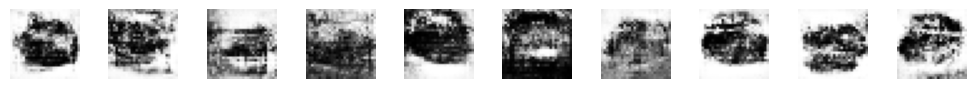

4/4 [==============================] - 0s 78ms/step
Epoch 2100, D Loss: 0.6928775608539581, G Loss: 0.6933495998382568
4/4 [==============================] - 1s 145ms/step


4/4 [==============================] - 0s 99ms/step
Epoch 2200, D Loss: 0.6932131052017212, G Loss: 0.6939692497253418
4/4 [==============================] - 1s 164ms/step
Epoch 2300, D Loss: 0.6933629810810089, G Loss: 0.6937072277069092
4/4 [==============================] - 1s 198ms/step


4/4 [==============================] - 0s 125ms/step
Epoch 2400, D Loss: 0.6938357055187225, G Loss: 0.6923735737800598
4/4 [==============================] - 1s 130ms/step


4/4 [==============================] - 1s 148ms/step
Epoch 2500, D Loss: 0.6935174465179443, G Loss: 0.6938716173171997
4/4 [==============================] - 0s 109ms/step
Epoch 2600, D Loss: 0.6937554180622101, G Loss: 0.692527174949646
4/4 [==============================] - 0s 120ms/step


4/4 [==============================] - 0s 118ms/step
Epoch 2700, D Loss: 0.6935794651508331, G Loss: 0.695652961730957
4/4 [==============================] - 0s 123ms/step


4/4 [==============================] - 0s 121ms/step
Epoch 2800, D Loss: 0.6934351921081543, G Loss: 0.6951917409896851
4/4 [==============================] - 0s 119ms/step
Epoch 2900, D Loss: 0.6924968659877777, G Loss: 0.69818115234375
4/4 [==============================] - 0s 120ms/step


4/4 [==============================] - 0s 123ms/step
Epoch 3000, D Loss: 0.6919591128826141, G Loss: 0.6979720592498779
1/1 [==============================] - 1s 781ms/step


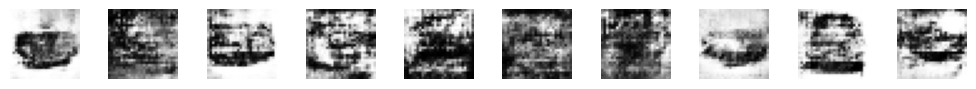

4/4 [==============================] - 1s 126ms/step
Epoch 3100, D Loss: 0.6940165162086487, G Loss: 0.6966006755828857
4/4 [==============================] - 1s 132ms/step


4/4 [==============================] - 1s 130ms/step
Epoch 3200, D Loss: 0.6927221417427063, G Loss: 0.6985155344009399
4/4 [==============================] - 1s 134ms/step
Epoch 3300, D Loss: 0.6933482885360718, G Loss: 0.6912596225738525
4/4 [==============================] - 1s 136ms/step


4/4 [==============================] - 1s 188ms/step
Epoch 3400, D Loss: 0.6919904947280884, G Loss: 0.6987621784210205
4/4 [==============================] - 1s 134ms/step


4/4 [==============================] - 1s 129ms/step
Epoch 3500, D Loss: 0.6910097599029541, G Loss: 0.7024924755096436
4/4 [==============================] - 1s 141ms/step
Epoch 3600, D Loss: 0.6919456422328949, G Loss: 0.6976622343063354
4/4 [==============================] - 1s 167ms/step


4/4 [==============================] - 1s 189ms/step
Epoch 3700, D Loss: 0.6892600357532501, G Loss: 0.7010645866394043
4/4 [==============================] - 1s 198ms/step


4/4 [==============================] - 1s 188ms/step
Epoch 3800, D Loss: 0.6911614835262299, G Loss: 0.6987256407737732
4/4 [==============================] - 1s 156ms/step
Epoch 3900, D Loss: 0.6921747922897339, G Loss: 0.6993171572685242
4/4 [==============================] - 1s 140ms/step


4/4 [==============================] - 1s 151ms/step
Epoch 4000, D Loss: 0.6904248297214508, G Loss: 0.7086873650550842
1/1 [==============================] - 1s 766ms/step


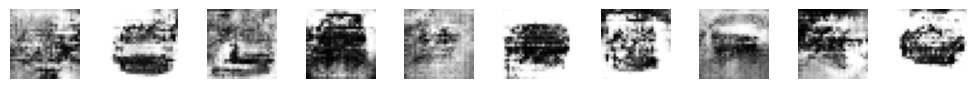

4/4 [==============================] - 1s 153ms/step
Epoch 4100, D Loss: 0.6927591562271118, G Loss: 0.7025126814842224
4/4 [==============================] - 1s 160ms/step


4/4 [==============================] - 1s 165ms/step
Epoch 4200, D Loss: 0.6909507215023041, G Loss: 0.7028926610946655
4/4 [==============================] - 1s 173ms/step
Epoch 4300, D Loss: 0.6933020651340485, G Loss: 0.7019079923629761
4/4 [==============================] - 1s 218ms/step


4/4 [==============================] - 1s 179ms/step
Epoch 4400, D Loss: 0.6923354864120483, G Loss: 0.7046447992324829
4/4 [==============================] - 1s 168ms/step


4/4 [==============================] - 1s 180ms/step
Epoch 4500, D Loss: 0.6930283308029175, G Loss: 0.7015377283096313
4/4 [==============================] - 1s 226ms/step
Epoch 4600, D Loss: 0.6905829012393951, G Loss: 0.7037913799285889
4/4 [==============================] - 1s 239ms/step


4/4 [==============================] - 1s 180ms/step
Epoch 4700, D Loss: 0.6915448307991028, G Loss: 0.7033904194831848
4/4 [==============================] - 1s 166ms/step


4/4 [==============================] - 1s 174ms/step
Epoch 4800, D Loss: 0.6906515061855316, G Loss: 0.704079806804657
4/4 [==============================] - 1s 174ms/step
Epoch 4900, D Loss: 0.690432220697403, G Loss: 0.7015630006790161
4/4 [==============================] - 1s 176ms/step


4/4 [==============================] - 1s 178ms/step
Epoch 5000, D Loss: 0.6910922825336456, G Loss: 0.6988101601600647
1/1 [==============================] - 1s 729ms/step


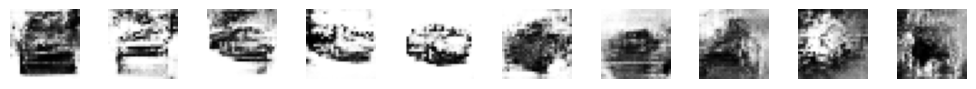

4/4 [==============================] - 1s 181ms/step
Epoch 5100, D Loss: 0.6922729909420013, G Loss: 0.6992346048355103
4/4 [==============================] - 1s 190ms/step


4/4 [==============================] - 1s 187ms/step
Epoch 5200, D Loss: 0.6916384100914001, G Loss: 0.7038247585296631
4/4 [==============================] - 1s 187ms/step
Epoch 5300, D Loss: 0.6903378665447235, G Loss: 0.7050819396972656
4/4 [==============================] - 1s 179ms/step


4/4 [==============================] - 1s 217ms/step
Epoch 5400, D Loss: 0.6917856633663177, G Loss: 0.7042314410209656
4/4 [==============================] - 1s 240ms/step


4/4 [==============================] - 1s 230ms/step
Epoch 5500, D Loss: 0.691418468952179, G Loss: 0.7048361301422119
4/4 [==============================] - 1s 212ms/step
Epoch 5600, D Loss: 0.6904828548431396, G Loss: 0.7105250954627991
4/4 [==============================] - 1s 212ms/step


4/4 [==============================] - 1s 183ms/step
Epoch 5700, D Loss: 0.6889656484127045, G Loss: 0.7046108841896057
4/4 [==============================] - 1s 187ms/step


4/4 [==============================] - 1s 196ms/step
Epoch 5800, D Loss: 0.6902396976947784, G Loss: 0.7087193131446838
4/4 [==============================] - 1s 196ms/step
Epoch 5900, D Loss: 0.6913862526416779, G Loss: 0.7071222066879272
4/4 [==============================] - 1s 193ms/step


4/4 [==============================] - 1s 217ms/step
Epoch 6000, D Loss: 0.6904299259185791, G Loss: 0.7070522308349609
1/1 [==============================] - 1s 501ms/step


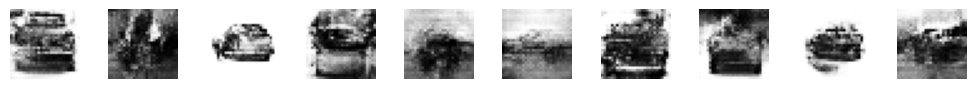

4/4 [==============================] - 1s 205ms/step
Epoch 6100, D Loss: 0.6923434436321259, G Loss: 0.7023563385009766
4/4 [==============================] - 1s 196ms/step


4/4 [==============================] - 1s 201ms/step
Epoch 6200, D Loss: 0.6916442513465881, G Loss: 0.70289146900177
4/4 [==============================] - 1s 207ms/step
Epoch 6300, D Loss: 0.690773218870163, G Loss: 0.7058771848678589
4/4 [==============================] - 1s 201ms/step


4/4 [==============================] - 1s 211ms/step
Epoch 6400, D Loss: 0.6894735097885132, G Loss: 0.6981252431869507
4/4 [==============================] - 1s 215ms/step


4/4 [==============================] - 1s 237ms/step
Epoch 6500, D Loss: 0.6900683641433716, G Loss: 0.7030153870582581
4/4 [==============================] - 1s 237ms/step
Epoch 6600, D Loss: 0.6929839253425598, G Loss: 0.7047923803329468
4/4 [==============================] - 1s 244ms/step


4/4 [==============================] - 1s 213ms/step
Epoch 6700, D Loss: 0.6913197040557861, G Loss: 0.7031263113021851
4/4 [==============================] - 1s 278ms/step


4/4 [==============================] - 1s 240ms/step
Epoch 6800, D Loss: 0.6879292726516724, G Loss: 0.7062232494354248
4/4 [==============================] - 2s 442ms/step
Epoch 6900, D Loss: 0.6906416714191437, G Loss: 0.7067223191261292
4/4 [==============================] - 1s 244ms/step


4/4 [==============================] - 2s 597ms/step
Epoch 7000, D Loss: 0.6910348534584045, G Loss: 0.7024562358856201
1/1 [==============================] - 1s 1s/step


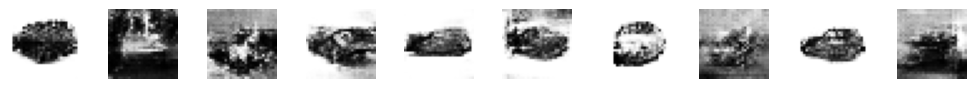

4/4 [==============================] - 2s 406ms/step
Epoch 7100, D Loss: 0.6920996010303497, G Loss: 0.7026925086975098
4/4 [==============================] - 2s 427ms/step


4/4 [==============================] - 1s 340ms/step
Epoch 7200, D Loss: 0.6895032227039337, G Loss: 0.7012428045272827
4/4 [==============================] - 2s 458ms/step
Epoch 7300, D Loss: 0.6885499954223633, G Loss: 0.7015120983123779
4/4 [==============================] - 2s 380ms/step


4/4 [==============================] - 1s 306ms/step
Epoch 7400, D Loss: 0.6889964640140533, G Loss: 0.7129793167114258
4/4 [==============================] - 1s 262ms/step


4/4 [==============================] - 1s 219ms/step
Epoch 7500, D Loss: 0.6884885132312775, G Loss: 0.707118034362793
4/4 [==============================] - 1s 307ms/step
Epoch 7600, D Loss: 0.6917310655117035, G Loss: 0.7026353478431702
4/4 [==============================] - 1s 307ms/step


4/4 [==============================] - 1s 318ms/step
Epoch 7700, D Loss: 0.689582347869873, G Loss: 0.711922287940979
4/4 [==============================] - 1s 323ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 7800, D Loss: 0.6907885670661926, G Loss: 0.7009499073028564
4/4 [==============================] - 1s 331ms/step
Epoch 7900, D Loss: 0.6944035887718201, G Loss: 0.7015140056610107
4/4 [==============================] - 1s 343ms/step


4/4 [==============================] - 1s 326ms/step
Epoch 8000, D Loss: 0.6900026500225067, G Loss: 0.7035478353500366
1/1 [==============================] - 1s 983ms/step


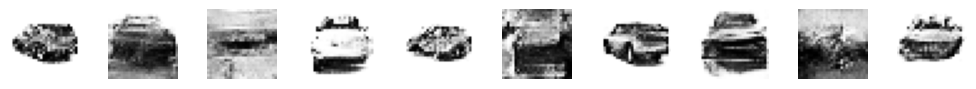

4/4 [==============================] - 1s 323ms/step
Epoch 8100, D Loss: 0.6887887418270111, G Loss: 0.7071434259414673
4/4 [==============================] - 1s 318ms/step


4/4 [==============================] - 1s 323ms/step
Epoch 8200, D Loss: 0.6897810697555542, G Loss: 0.7003796696662903
4/4 [==============================] - 1s 323ms/step
Epoch 8300, D Loss: 0.6939199268817902, G Loss: 0.705571174621582
4/4 [==============================] - 1s 328ms/step


4/4 [==============================] - 1s 328ms/step
Epoch 8400, D Loss: 0.6910911500453949, G Loss: 0.7052234411239624
4/4 [==============================] - 1s 331ms/step


4/4 [==============================] - 1s 328ms/step
Epoch 8500, D Loss: 0.694150984287262, G Loss: 0.7033270597457886
4/4 [==============================] - 1s 312ms/step
Epoch 8600, D Loss: 0.6881005764007568, G Loss: 0.7067184448242188
4/4 [==============================] - 1s 318ms/step


4/4 [==============================] - 2s 410ms/step
Epoch 8700, D Loss: 0.6876960098743439, G Loss: 0.7102210521697998
4/4 [==============================] - 1s 339ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 8800, D Loss: 0.6879757642745972, G Loss: 0.7142652273178101
4/4 [==============================] - 2s 417ms/step
Epoch 8900, D Loss: 0.6885712742805481, G Loss: 0.7121347188949585
4/4 [==============================] - 1s 328ms/step


4/4 [==============================] - 1s 318ms/step
Epoch 9000, D Loss: 0.6861478984355927, G Loss: 0.7042044997215271
1/1 [==============================] - 0s 250ms/step


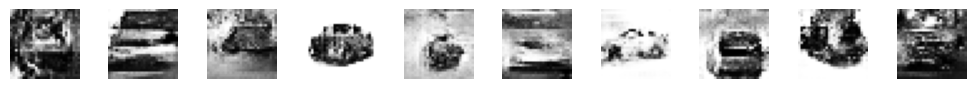

4/4 [==============================] - 1s 323ms/step
Epoch 9100, D Loss: 0.6891965270042419, G Loss: 0.7120219469070435
4/4 [==============================] - 1s 323ms/step


4/4 [==============================] - 1s 318ms/step
Epoch 9200, D Loss: 0.6916983127593994, G Loss: 0.7091694474220276
4/4 [==============================] - 1s 328ms/step
Epoch 9300, D Loss: 0.6905054450035095, G Loss: 0.7101678252220154
4/4 [==============================] - 1s 328ms/step


4/4 [==============================] - 1s 323ms/step
Epoch 9400, D Loss: 0.6873999834060669, G Loss: 0.7158936262130737
4/4 [==============================] - 1s 312ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 9500, D Loss: 0.688022792339325, G Loss: 0.6992975473403931
4/4 [==============================] - 1s 318ms/step
Epoch 9600, D Loss: 0.6924786865711212, G Loss: 0.7087041139602661
4/4 [==============================] - 1s 328ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 9700, D Loss: 0.6896377503871918, G Loss: 0.7133442759513855
4/4 [==============================] - 1s 329ms/step


4/4 [==============================] - 1s 328ms/step
Epoch 9800, D Loss: 0.6906825304031372, G Loss: 0.7039359211921692
4/4 [==============================] - 2s 384ms/step
Epoch 9900, D Loss: 0.6864496469497681, G Loss: 0.7113605737686157
4/4 [==============================] - 1s 339ms/step


4/4 [==============================] - 1s 339ms/step
Epoch 10000, D Loss: 0.6888361275196075, G Loss: 0.7105972170829773
1/1 [==============================] - 0s 391ms/step


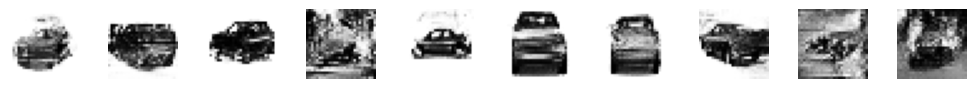

4/4 [==============================] - 1s 318ms/step
Epoch 10100, D Loss: 0.6876989603042603, G Loss: 0.7087153196334839
4/4 [==============================] - 1s 333ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 10200, D Loss: 0.6858414113521576, G Loss: 0.7094709873199463
4/4 [==============================] - 1s 333ms/step
Epoch 10300, D Loss: 0.6902839839458466, G Loss: 0.7112521529197693
4/4 [==============================] - 1s 333ms/step


4/4 [==============================] - 1s 344ms/step
Epoch 10400, D Loss: 0.6914991438388824, G Loss: 0.7123236656188965
4/4 [==============================] - 1s 339ms/step


4/4 [==============================] - 1s 339ms/step
Epoch 10500, D Loss: 0.6892204880714417, G Loss: 0.7106674313545227
4/4 [==============================] - 1s 344ms/step
Epoch 10600, D Loss: 0.6942058205604553, G Loss: 0.705322265625
4/4 [==============================] - 1s 344ms/step


4/4 [==============================] - 1s 333ms/step
Epoch 10700, D Loss: 0.6914442181587219, G Loss: 0.7119412422180176
4/4 [==============================] - 1s 344ms/step


4/4 [==============================] - 1s 349ms/step
Epoch 10800, D Loss: 0.6893965899944305, G Loss: 0.7140037417411804
4/4 [==============================] - 1s 353ms/step
Epoch 10900, D Loss: 0.6876360774040222, G Loss: 0.7125968933105469
4/4 [==============================] - 2s 371ms/step


4/4 [==============================] - 1s 367ms/step
Epoch 11000, D Loss: 0.6892538070678711, G Loss: 0.7057540416717529
1/1 [==============================] - 0s 484ms/step


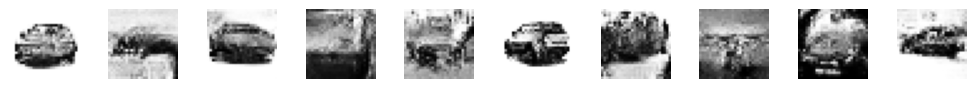

4/4 [==============================] - 2s 370ms/step
Epoch 11100, D Loss: 0.6876968145370483, G Loss: 0.7019815444946289
4/4 [==============================] - 1s 343ms/step


4/4 [==============================] - 1s 368ms/step
Epoch 11200, D Loss: 0.6911335587501526, G Loss: 0.7102200388908386
4/4 [==============================] - 1s 359ms/step
Epoch 11300, D Loss: 0.6921429932117462, G Loss: 0.705817699432373
4/4 [==============================] - 1s 333ms/step


4/4 [==============================] - 1s 365ms/step
Epoch 11400, D Loss: 0.6906895935535431, G Loss: 0.712982177734375
4/4 [==============================] - 1s 354ms/step


4/4 [==============================] - 1s 339ms/step
Epoch 11500, D Loss: 0.6889916360378265, G Loss: 0.7140545845031738
4/4 [==============================] - 1s 328ms/step
Epoch 11600, D Loss: 0.6908580958843231, G Loss: 0.713271975517273
4/4 [==============================] - 1s 359ms/step


4/4 [==============================] - 1s 344ms/step
Epoch 11700, D Loss: 0.6904234886169434, G Loss: 0.7052837610244751
4/4 [==============================] - 1s 349ms/step


4/4 [==============================] - 1s 349ms/step
Epoch 11800, D Loss: 0.6865607500076294, G Loss: 0.7140191793441772
4/4 [==============================] - 1s 328ms/step
Epoch 11900, D Loss: 0.6876328885555267, G Loss: 0.7087723016738892
4/4 [==============================] - 1s 333ms/step


4/4 [==============================] - 1s 359ms/step
Epoch 12000, D Loss: 0.689130961894989, G Loss: 0.7031944990158081
1/1 [==============================] - 0s 281ms/step


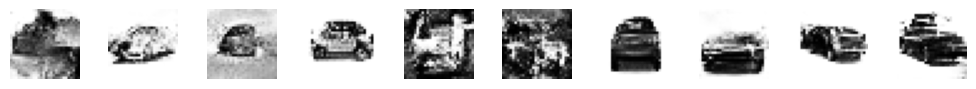

4/4 [==============================] - 2s 391ms/step
Epoch 12100, D Loss: 0.6869626641273499, G Loss: 0.7112911343574524
4/4 [==============================] - 2s 365ms/step


4/4 [==============================] - 1s 354ms/step
Epoch 12200, D Loss: 0.6861594021320343, G Loss: 0.7140156030654907
4/4 [==============================] - 1s 359ms/step
Epoch 12300, D Loss: 0.6868164837360382, G Loss: 0.714314877986908
4/4 [==============================] - 1s 359ms/step


4/4 [==============================] - 1s 354ms/step
Epoch 12400, D Loss: 0.6907116770744324, G Loss: 0.710578441619873
4/4 [==============================] - 1s 359ms/step


4/4 [==============================] - 1s 391ms/step
Epoch 12500, D Loss: 0.6921771466732025, G Loss: 0.7124972343444824
4/4 [==============================] - 2s 427ms/step
Epoch 12600, D Loss: 0.6862208545207977, G Loss: 0.7200449705123901
4/4 [==============================] - 1s 355ms/step


4/4 [==============================] - 1s 365ms/step
Epoch 12700, D Loss: 0.6917866170406342, G Loss: 0.719110369682312
4/4 [==============================] - 1s 354ms/step


4/4 [==============================] - 1s 339ms/step
Epoch 12800, D Loss: 0.6880309879779816, G Loss: 0.7188934683799744
4/4 [==============================] - 1s 352ms/step
Epoch 12900, D Loss: 0.6854338049888611, G Loss: 0.7167909145355225
4/4 [==============================] - 2s 427ms/step


4/4 [==============================] - 2s 393ms/step
Epoch 13000, D Loss: 0.6899164319038391, G Loss: 0.719105064868927
1/1 [==============================] - 0s 219ms/step


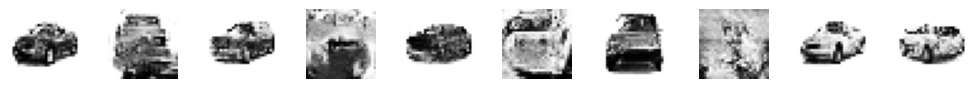

4/4 [==============================] - 2s 391ms/step
Epoch 13100, D Loss: 0.6906074583530426, G Loss: 0.7120943069458008
4/4 [==============================] - 2s 414ms/step


4/4 [==============================] - 2s 365ms/step
Epoch 13200, D Loss: 0.689193993806839, G Loss: 0.7197809219360352
4/4 [==============================] - 2s 402ms/step
Epoch 13300, D Loss: 0.6874073445796967, G Loss: 0.7195168733596802
4/4 [==============================] - 1s 334ms/step


4/4 [==============================] - 2s 380ms/step
Epoch 13400, D Loss: 0.6874328255653381, G Loss: 0.720906138420105
4/4 [==============================] - 2s 458ms/step


4/4 [==============================] - 2s 344ms/step
Epoch 13500, D Loss: 0.6883192956447601, G Loss: 0.7238719463348389
4/4 [==============================] - 2s 380ms/step
Epoch 13600, D Loss: 0.6883906126022339, G Loss: 0.7132891416549683
4/4 [==============================] - 2s 401ms/step


4/4 [==============================] - 2s 396ms/step
Epoch 13700, D Loss: 0.68907630443573, G Loss: 0.7190756797790527
4/4 [==============================] - 2s 486ms/step


4/4 [==============================] - 2s 423ms/step
Epoch 13800, D Loss: 0.6904605627059937, G Loss: 0.7189546823501587
4/4 [==============================] - 2s 423ms/step
Epoch 13900, D Loss: 0.6873765885829926, G Loss: 0.712897777557373
4/4 [==============================] - 2s 447ms/step


4/4 [==============================] - 2s 406ms/step
Epoch 14000, D Loss: 0.686802476644516, G Loss: 0.7150614857673645
1/1 [==============================] - 2s 2s/step


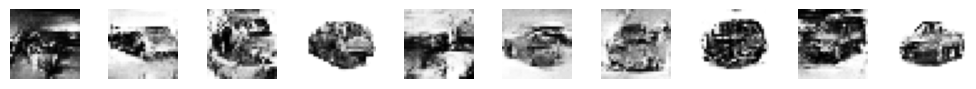

4/4 [==============================] - 2s 385ms/step
Epoch 14100, D Loss: 0.6880606412887573, G Loss: 0.7250137329101562
4/4 [==============================] - 1s 327ms/step


4/4 [==============================] - 2s 448ms/step
Epoch 14200, D Loss: 0.6881101131439209, G Loss: 0.7164755463600159
4/4 [==============================] - 2s 432ms/step
Epoch 14300, D Loss: 0.6882395446300507, G Loss: 0.7145377397537231
4/4 [==============================] - 2s 401ms/step


4/4 [==============================] - 2s 347ms/step


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import os
import cv2

# Specify the path to the folder containing car images
dataset_path = "C:\\Users\\ramch\\Documents\\GenerativeAIBook\\Chapter 4\\thecarconnectionpicturedataset"

# Create a list to store the images
car_images = []

# Loop through the images in the dataset folder
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dataset_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        img = cv2.resize(img, (28, 28))  # Resize image to 28x28 pixels
        img = img.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
        car_images.append(img)

# Convert the list of images to a numpy array
x_train = np.array(car_images)

# Reshape the images to (num_samples, 28, 28, 1) format
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Rest of the code (generator, discriminator, training loop) remains the same.


# Define the generator
generator = keras.Sequential(
    [
        keras.Input(shape=(100,)),
        layers.Dense(7 * 7 * 256),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same"),
        layers.BatchNormalization(momentum=0.8),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

# Define the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

# Compile the discriminator
discriminator.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5), metrics=["accuracy"])

# Compile the combined GAN model
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, 0.5))

# Define the save_generated_images function
def save_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap="gray")
        axs[i].axis("off")
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Training loop
batch_size = 128
epochs = 40000

for epoch in range(epochs):
    # Train the discriminator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
    
    # Save generated images
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)


In [ ]:
print('Hi')